# Visualizing Latent Space with Dimensionality Reduction

In this notebook, we aim to gain insights into the latent space of a BigBiGAN (Big Generative Adversarial Network) Encoder using dimensionality reduction techniques such as Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE). The primary goal is to visualize the latent representations of Fashion MNIST (FMNIST) data and identify instances of ambiguous or incorrectly reconstructed images based on a given class.

## Background

BigBiGAN is a powerful generative model that learns a joint distribution of images and their corresponding latent codes. The latent space encodes meaningful features of the data, allowing for effective generation and reconstruction. However, understanding the structure of this latent space can be challenging, especially when dealing with ambiguous or misclassified data.

## Objectives

1. Utilize PCA and t-SNE to reduce the dimensionality of the BigBiGAN latent space.
2. Visualize the distribution of latent codes in a lower-dimensional space.
3. Identify instances of incorrect reconstruction or ambiguity within the latent representations.

## Dataset

We will be using the Fashion MNIST (FMNIST) dataset for this analysis. Ensure that you have the FMNIST dataset and a trained BigBiGAN model for experimentation. The notebook will guide you through the process of applying dimen


In [1]:
import argparse
import itertools

from src.pipeline import pipeline
from src.training_utils import training_utils

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
EXP_HPARAMS = {
    "params": (
        {},
    ),
    "seeds": (420,),
}
config = training_utils.get_config("FMNIST")
for hparams_overwrite_list, seed in itertools.product(EXP_HPARAMS["params"], EXP_HPARAMS["seeds"]):
    hparams_str = ""
    for k, v in hparams_overwrite_list.items():
        config[k] = v
        hparams_str += str(k) + "-" + str(v) + "_"
    config["model_architecture"] = "bigbigan"
    config["hparams_str"] = hparams_str.strip("_")
    config["seed"] = seed
    #set batch size
    config["bs"] = 1
    config["latent_dim"] = 4
    #set latent dim


In [3]:
pip = pipeline.BigBiGANInference.from_checkpoint(checkpoint_path="./data/FMNIST/bigbigan/checkpoints/checkpoint_40.pth", data_path="./data", config=config)


0it [00:00, ?it/s]

Latent shape:  torch.Size([1, 4])


0it [00:00, ?it/s]


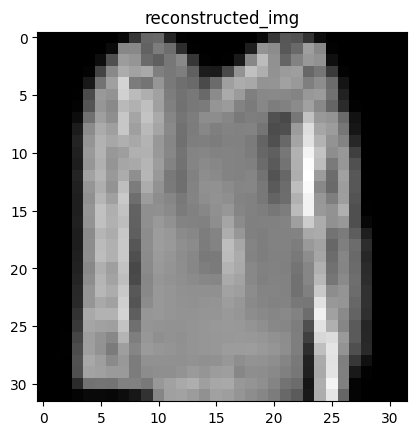

In [66]:
pip.inference()

In [54]:
import torch
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


# Download and load the dataset
FMNIST = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

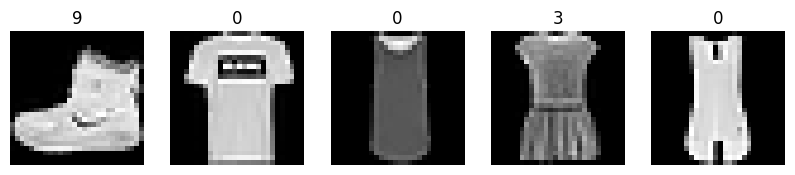

In [58]:
#SPLIT FMNIST INTO TRAIN AND TEST
FMNIST_train = FMNIST.data[:50000]
FMNIST_test = FMNIST.data[50000:]
FMNIST_train = FMNIST_train.unsqueeze(1).float()
FMNIST_test = FMNIST_test.unsqueeze(1).float()

#PLOT some images with labels
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(FMNIST_train[i].squeeze(), cmap='gray')
    ax.set_title(FMNIST.targets[i].item())
    ax.axis('off')
plt.show()




In [64]:
test_dataloader = torch.utils.data.DataLoader(FMNIST_test, batch_size=1, shuffle=True)

In [65]:
pip.inference_fromdt(test_dataloader)

0it [00:00, ?it/s]


ValueError: not enough values to unpack (expected 2, got 1)

In [12]:
def print_labels(dataset):
    labels = []
    for _, label in dataset:
        labels.append(label)
    print(set(labels))
    
def plot_images(images, labels, title):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 3))
    fig.suptitle(title, fontsize=16)
    for i, (img, label) in enumerate(zip(images, labels)):
        axs[i].imshow(np.transpose(img.numpy(), (1, 2, 0)).squeeze(), cmap='gray')
        axs[i].set_title(f'Label: {label.item()}')
        axs[i].axis('off')
    plt.show()

def get_dataloader(dataset, batch_size=1, class_label=[0]):
    filtered_indices = [i for i, (_, label) in enumerate(dataset) if label in class_label]
    filtered_dataset = torch.utils.data.Subset(dataset, filtered_indices)
    dataloader = torch.utils.data.DataLoader(filtered_dataset, batch_size=batch_size, shuffle=True)
    #Print the number of images in the dataloader
    print(f"Number of images in dataloader: {len(dataloader)}")
    #PLOT IMAGES
    return dataloader
    
def plot_batch(dataloader, title):
    for batch_images, batch_labels in dataloader:
        # Plot the images from the batch
        plot_images(batch_images, batch_labels, 'Sample Images from class: ')
        break  # Only plot the first batch for demonstration purposes

def encode_batch(pip, dataloader):
    print("Dataloader size: ", len(dataloader))
    encoded_images = []
    for batch_images, batch_labels in dataloader:
        #batch_images = batch_images.unsqueeze(0)
        batch_images = batch_images.to(config.device)
        z_img = pip.encode(batch_images)
        encoded_images.append(z_img.detach().cpu().numpy())
    #encoded_images = np.array(encoded_images)
    encoded_images = np.concatenate(encoded_images, axis=0)

    return encoded_images

In [14]:
dt_one = get_dataloader(test_dataset, batch_size=1, class_label=[1])
dt_two = get_dataloader(test_dataset, batch_size=1, class_label=[2])
dt_three = get_dataloader(test_dataset, batch_size=1, class_label=[3])
dt_four = get_dataloader(test_dataset, batch_size=1, class_label=[4])
dt_five = get_dataloader(test_dataset, batch_size=1, class_label=[5])
dt_six = get_dataloader(test_dataset, batch_size=1, class_label=[6])
dt_seven = get_dataloader(test_dataset, batch_size=1, class_label=[7])
dt_eight = get_dataloader(test_dataset, batch_size=1, class_label=[8])
dt_nine = get_dataloader(test_dataset, batch_size=1, class_label=[9])
dt_zero = get_dataloader(test_dataset, batch_size=1, class_label=[0])

Number of images in dataloader: 102
Number of images in dataloader: 100
Number of images in dataloader: 117
Number of images in dataloader: 109
Number of images in dataloader: 85
Number of images in dataloader: 90
Number of images in dataloader: 89
Number of images in dataloader: 89
Number of images in dataloader: 103
Number of images in dataloader: 116


In [13]:
# take an item from the dataloader and encode it
z_one = encode_batch(pip, dt_one)
z_two = encode_batch(pip, dt_two)
z_three = encode_batch(pip, dt_three)
z_four = encode_batch(pip, dt_four)
z_five = encode_batch(pip, dt_five)
z_six = encode_batch(pip, dt_six)
z_seven = encode_batch(pip, dt_seven)
z_eight = encode_batch(pip, dt_eight)
z_nine = encode_batch(pip, dt_nine)
z_zero = encode_batch(pip, dt_zero)

Number of images in dataloader: 102
Number of images in dataloader: 100
Number of images in dataloader: 117
Number of images in dataloader: 109
Number of images in dataloader: 85
Number of images in dataloader: 90
Number of images in dataloader: 89
Number of images in dataloader: 89
Number of images in dataloader: 103
Number of images in dataloader: 116
Dataloader size:  102
Dataloader size:  100
Dataloader size:  117
Dataloader size:  109
Dataloader size:  85
Dataloader size:  90
Dataloader size:  89
Dataloader size:  89
Dataloader size:  103
Dataloader size:  116


0it [00:00, ?it/s]

Latent shape:  torch.Size([1, 4])


0it [00:00, ?it/s]


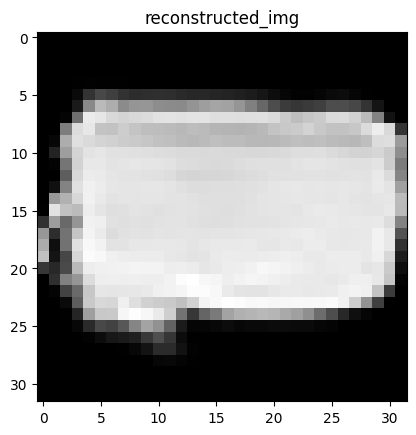

In [35]:
#Trouser 1
#Dress 3


In [32]:
#TSNE
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap

# Concatenate the data
X = np.concatenate((z_zero, z_one, z_two, z_three, z_four, z_five, z_six, z_seven, z_eight, z_nine), axis=0)
print(X.shape)

label_dict = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
class_labels = ["Tshirt", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Create the labels
y = np.concatenate((np.zeros(z_zero.shape[0]), np.ones(z_one.shape[0]), np.ones(z_two.shape[0])*2, np.ones(z_three.shape[0])*3, np.ones(z_four.shape[0])*4, np.ones(z_five.shape[0])*5, np.ones(z_six.shape[0])*6, np.ones(z_seven.shape[0])*7, np.ones(z_eight.shape[0])*8, np.ones(z_nine.shape[0])*9), axis=0)
print(y.shape)
#Match labels index with label name
y_string = [label_dict[i] for i in y]


# Create the TSNE model
tsne = TSNE(n_components=2, perplexity=50)

# Fit and transform the data
X_2d = tsne.fit_transform(X)
print(X_2d.shape)

(2000, 4)
(2000,)
(2000, 2)


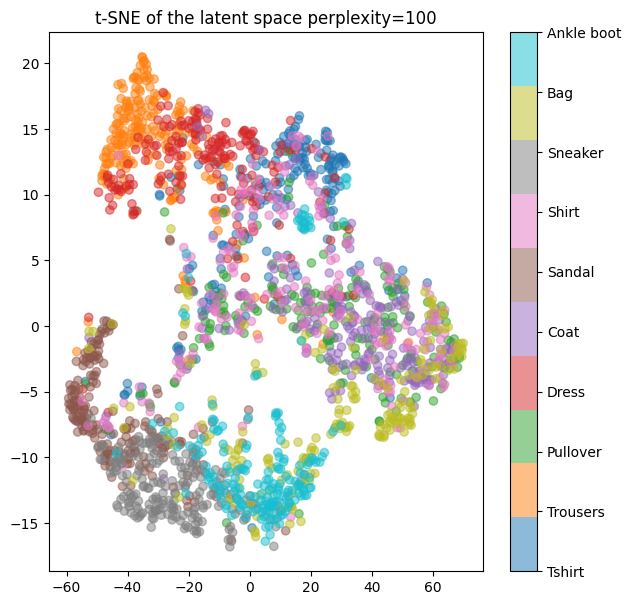

In [35]:
# Visualize the data
plt.figure(figsize=(7, 7))
plt.title("t-SNE of the latent space perplexity=100")
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', alpha=0.5)

# Create a custom colorbar with specified labels
custom_cmap = ListedColormap(['tab10(%d)' % i for i in range(len(class_labels))])
cbar = plt.colorbar(scatter, ticks=range(len(class_labels)))
cbar.set_ticklabels(class_labels)
plt.show()

In [37]:
X = np.concatenate((z_zero, z_one, z_two, z_three, z_four, z_five, z_six, z_seven, z_eight, z_nine), axis=0)
print(X.shape)

# Create the labels
y = np.concatenate((np.zeros(z_zero.shape[0]), np.ones(z_one.shape[0]), np.ones(z_two.shape[0])*2, np.ones(z_three.shape[0])*3, np.ones(z_four.shape[0])*4, np.ones(z_five.shape[0])*5, np.ones(z_six.shape[0])*6, np.ones(z_seven.shape[0])*7, np.ones(z_eight.shape[0])*8, np.ones(z_nine.shape[0])*9), axis=0)
print(y.shape)
#Match labels index with label name
y_string = [label_dict[i] for i in y]


pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

print(pca_2d.shape)

(2000, 4)
(2000,)
(2000, 2)


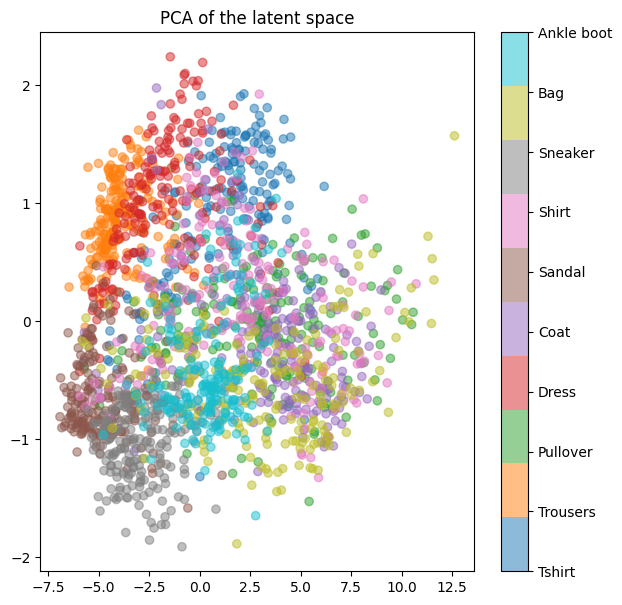

In [38]:
# Visualize the data
plt.figure(figsize=(7, 7))
plt.title("PCA of the latent space")
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y, cmap='tab10', alpha=0.5)

# Create a custom colorbar with specified labels
custom_cmap = ListedColormap(['tab10(%d)' % i for i in range(len(class_labels))])
cbar = plt.colorbar(scatter, ticks=range(len(class_labels)))
cbar.set_ticklabels(class_labels)
plt.show()